In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

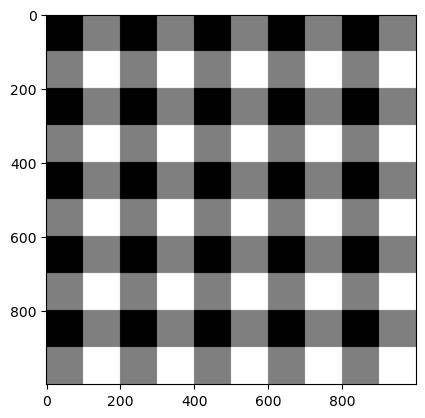

In [73]:
# Ejercicio 1. 
# Genera una imagen semejante a un tablero de ajedrez tomando en cuenta que cada 
# casilla debe medir 100x100 px  como se muestra en la imagen a continuación (toma en 
# cuenta la saturación de los colores)

color = [255, 255, 255]
color2 = [127, 127, 127] 


filas, columnas = 1000, 1000 
nI = filas/10
nJ = columnas/10
img = np.zeros((filas, columnas, 3), dtype= np.uint8) 



def pintar(img,x0,x1,y0,y1,color):
    for x in range(int(x0),int(x1)):
        for y in range(int(y0),int(y1)):
            img[x][y] = np.array(color) 

for i in range(10):
    for j in range(10):
        if (i+j)%2==1: 
            pintar(img, i * nI, (i + 1) * nI, j * nJ, (j + 1) * nJ, color2) 
        elif(i%2==1):
            pintar(img, i * nI, (i + 1) * nI, j * nJ, (j + 1) * nJ, color) 



plt.imshow(img)
plt.show()

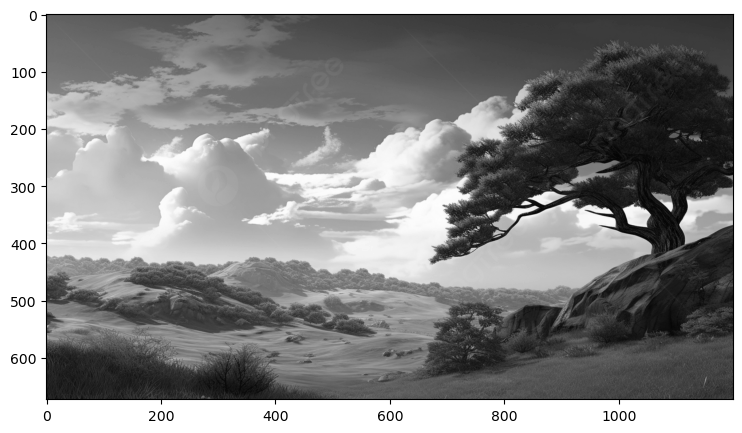

In [100]:
# Ejercicio 2. 
# Tomando en cuenta la imagen2.jpg aplica un degradado lineal en ella. 

w = 200
h = 200 

gradiante = np.zeros((h, w, 3), dtype= np.uint8)

for i in range(w):
    gradiante[i] = [i * 0 // w, 127 - i * 127 // w, 0]

plt.figure(figsize=(10, 5))

plt.imshow(gradiante)


img = cv.imread('..//img/img1e.jpg', 0)



plt.imshow(img, cmap='gray')

In [ ]:
# Ejercicio 2. 
# Tomando en cuenta la imagen2.jpg aplica un degradado lineal en ella. 

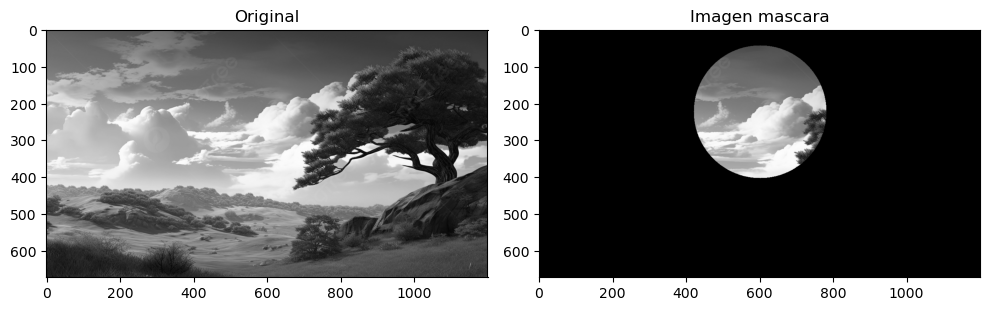

In [137]:
# Ejercicio 3. 
# En la imagen1.jpg aplica una mascara triangular como se ve en la imagen. 


img = cv.imread('..//img/img1e.jpg', cv.IMREAD_GRAYSCALE)

alto, ancho = img.shape[:2]

mascara = np.zeros_like(img)
circulo = (ancho // 2, alto // 3)
# circulo = (ancho // 2, alto // 2)
radio = 180
# radio = 100

cv.circle(mascara, circulo, radio, (255), -1)



img_fin = cv.bitwise_and(img, img, mask=mascara)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('Imagen mascara')
plt.imshow(cv.cvtColor(img_fin, cv.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

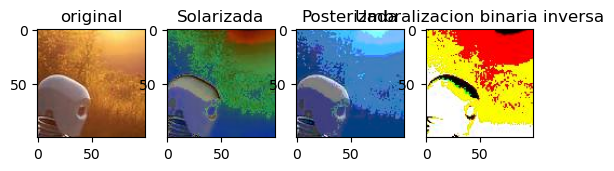

In [133]:


def solarizar (imagen, umbral):
    imgSolarizada = np.where(imagen < umbral, imagen, 255 - imagen)
    return imgSolarizada

def posterizar(imagen, nivel):
    f_nvl = 255/ nivel
    img_poster = np.round(imagen/f_nvl) * f_nvl
    return img_poster.astype(np.uint8)











img = cv.imread('..//img/img2e.jpg')

# plt.imshow(img[200:300, 100:200, :])


imagensita = img[200:300, 100:200, :]
plt.imsave('..//img/imagensitaExam.jpg', imagensita)

img = cv.imread('..//img/imagensitaExam.jpg', 1)
histograma = np.histogram(img, 256, [0, 256])

red, green, blue = cv.split(img)

contraste_blue = cv.equalizeHist(red)
contraste_red =  cv.equalizeHist(green)
contraste_green = cv.equalizeHist(blue)
finImgEcua = cv.merge((contraste_red, contraste_green, contraste_blue))
# histograma por colores
histograma_ecua = np.histogram(finImgEcua, 256, [0, 256])



umbral = 100
nivel = 4
# sola
img_sol = solarizar(img, umbral)
# post
img_post = posterizar(img, nivel)

# Umbralizacion binaria inversa 
_, umbralBinv = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
plt.imsave('..//img/img_par_sol.jpg', img_sol)
plt.imsave('..//img/img_par_post.jpg', img_post)
plt.imsave('..//img/img_par_umbra.jpg', umbralBinv)

img1 = cv.imread('..//img/img_par_sol.jpg')
img2 = cv.imread('..//img/img_par_post.jpg')
img3 = cv.imread('..//img/img_par_umbra.jpg')

plt.subplot(1,4,1)
plt.title('original')
plt.imshow(img)


plt.subplot(1,4,2)
plt.title('Solarizada')
plt.imshow(img1)

plt.subplot(1,4,3)
plt.title('Posterizada')
plt.imshow(img2)

plt.subplot(1,4,4)
plt.title('Umbralizacion binaria inversa')
plt.imshow(img3)




In [ ]:
# Teoría: 
# ¿A que nos referimos si hablamos de una imagen digital? 
# nos referimos a una matriz
# ¿Qué es la profundidad del color ? 
# 
# ¿Cuál es la diferencia entre CMKY y RGB?
# los colore primarios que manjan 
# cyan magenta black yellow, red green blue